In [22]:
root_dir = 'D:/vhproj\intrusion-network'
data_dir = 'data/processed/demo_data.csv'

In [23]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support, 
                           confusion_matrix, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [24]:
# load dataset (fixed path building)
path = os.path.join(root_dir, data_dir)
df = pd.read_csv(path)
print('Loaded df shape:', df.shape)
print('Columns:', df.columns.tolist())

Loaded df shape: (186876, 21)
Columns: ['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'syn_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'UDP', 'Min', 'IAT', 'Number', 'Magnitue', 'Radius', 'Variance', 'Weight', 'label']


In [25]:
# Prepare data, train, evaluate, and save model
# Target label is 'label'
target = 'label'
if target not in df.columns:
    raise KeyError(f"Target column '{target}' not found in dataframe")

# Analyze class distribution before encoding
print("Class Distribution:")
class_dist = df[target].value_counts()
print(class_dist)
print("\nTotal samples:", len(df))
print("Number of classes:", len(class_dist))

# Mã hoá target label từ chuỗi sang số
le = LabelEncoder()
y = le.fit_transform(df[target])
print("\nLabel Encoding:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# Features 
X = df.drop(columns=[target])
# Keep numeric features only
X_num = X.select_dtypes(include=[np.number]).copy()
print("\nNumeric features shape:", X_num.shape)
print("Number of features:", X_num.shape[1])

# Handle missing values
missing_count = X_num.isnull().sum()
if missing_count.any():
    print("\nMissing values found:")
    print(missing_count[missing_count > 0])
    print("Filling missing values with 0")
X_num = X_num.fillna(0)

Class Distribution:
label
DDoS-ICMP_Flood            20000
DDoS-UDP_Flood             20000
DDoS-PSHACK_Flood          20000
DDoS-SYN_Flood             20000
DDoS-RSTFINFlood           20000
DDoS-TCP_Flood             20000
DDoS-SynonymousIP_Flood    18637
DoS-UDP_Flood              16779
DoS-TCP_Flood              13715
DoS-SYN_Flood              10368
DDoS-ICMP_Fragmentation     2237
MITM-ArpSpoofing            1603
DDoS-ACK_Fragmentation      1468
DDoS-UDP_Fragmentation      1445
DoS-HTTP_Flood               359
DDoS-HTTP_Flood              153
DDoS-SlowLoris               112
Name: count, dtype: int64

Total samples: 186876
Number of classes: 17

Label Encoding:
DDoS-ACK_Fragmentation -> 0
DDoS-HTTP_Flood -> 1
DDoS-ICMP_Flood -> 2
DDoS-ICMP_Fragmentation -> 3
DDoS-PSHACK_Flood -> 4
DDoS-RSTFINFlood -> 5
DDoS-SYN_Flood -> 6
DDoS-SlowLoris -> 7
DDoS-SynonymousIP_Flood -> 8
DDoS-TCP_Flood -> 9
DDoS-UDP_Flood -> 10
DDoS-UDP_Fragmentation -> 11
DoS-HTTP_Flood -> 12
DoS-SYN_Flood -> 13
D

In [26]:
# Split data with stratification
print("Splitting data (80% train, 20% test) with stratification...")
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensure class distribution is preserved
)

# Print split sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Verify class distribution in splits
train_dist = pd.Series(le.inverse_transform(y_train)).value_counts()
test_dist = pd.Series(le.inverse_transform(y_test)).value_counts()
print("\nClass distribution in splits:")
print("\nTraining set:")
print(train_dist)
print("\nTest set:")
print(test_dist)

Splitting data (80% train, 20% test) with stratification...
Training set: 149500 samples
Test set: 37376 samples

Class distribution in splits:

Training set:
DDoS-TCP_Flood             16000
DDoS-RSTFINFlood           16000
DDoS-UDP_Flood             16000
DDoS-PSHACK_Flood          16000
DDoS-SYN_Flood             16000
DDoS-ICMP_Flood            16000
DDoS-SynonymousIP_Flood    14910
DoS-UDP_Flood              13423
DoS-TCP_Flood              10972
DoS-SYN_Flood               8294
DDoS-ICMP_Fragmentation     1790
MITM-ArpSpoofing            1282
DDoS-ACK_Fragmentation      1174
DDoS-UDP_Fragmentation      1156
DoS-HTTP_Flood               287
DDoS-HTTP_Flood              122
DDoS-SlowLoris                90
Name: count, dtype: int64

Test set:
DDoS-RSTFINFlood           4000
DDoS-PSHACK_Flood          4000
DDoS-TCP_Flood             4000
DDoS-ICMP_Flood            4000
DDoS-UDP_Flood             4000
DDoS-SYN_Flood             4000
DDoS-SynonymousIP_Flood    3727
DoS-UDP_Flood      

In [27]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Classification Metrics:
Accuracy: 0.2539
Precision (weighted): 0.1885
Recall (weighted): 0.2539
F1 Score (weighted): 0.2093

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       294
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00      4000
           3       0.03      0.02      0.03       447
           4       0.49      0.93      0.65      4000
           5       0.94      0.93      0.94      4000
           6       0.00      0.00      0.00      4000
           7       0.00      0.00      0.00        22
           8       0.29      0.52      0.37      3727
           9       0.01      0.01      0.01      4000
          10       0.00      0.00      0.00      4000
          11       0.00      0.00      0.00       289
          12       0.00      0.08      0.01        72
          13       0.00      0.00      0.00      2074
          14       0.04      0.0

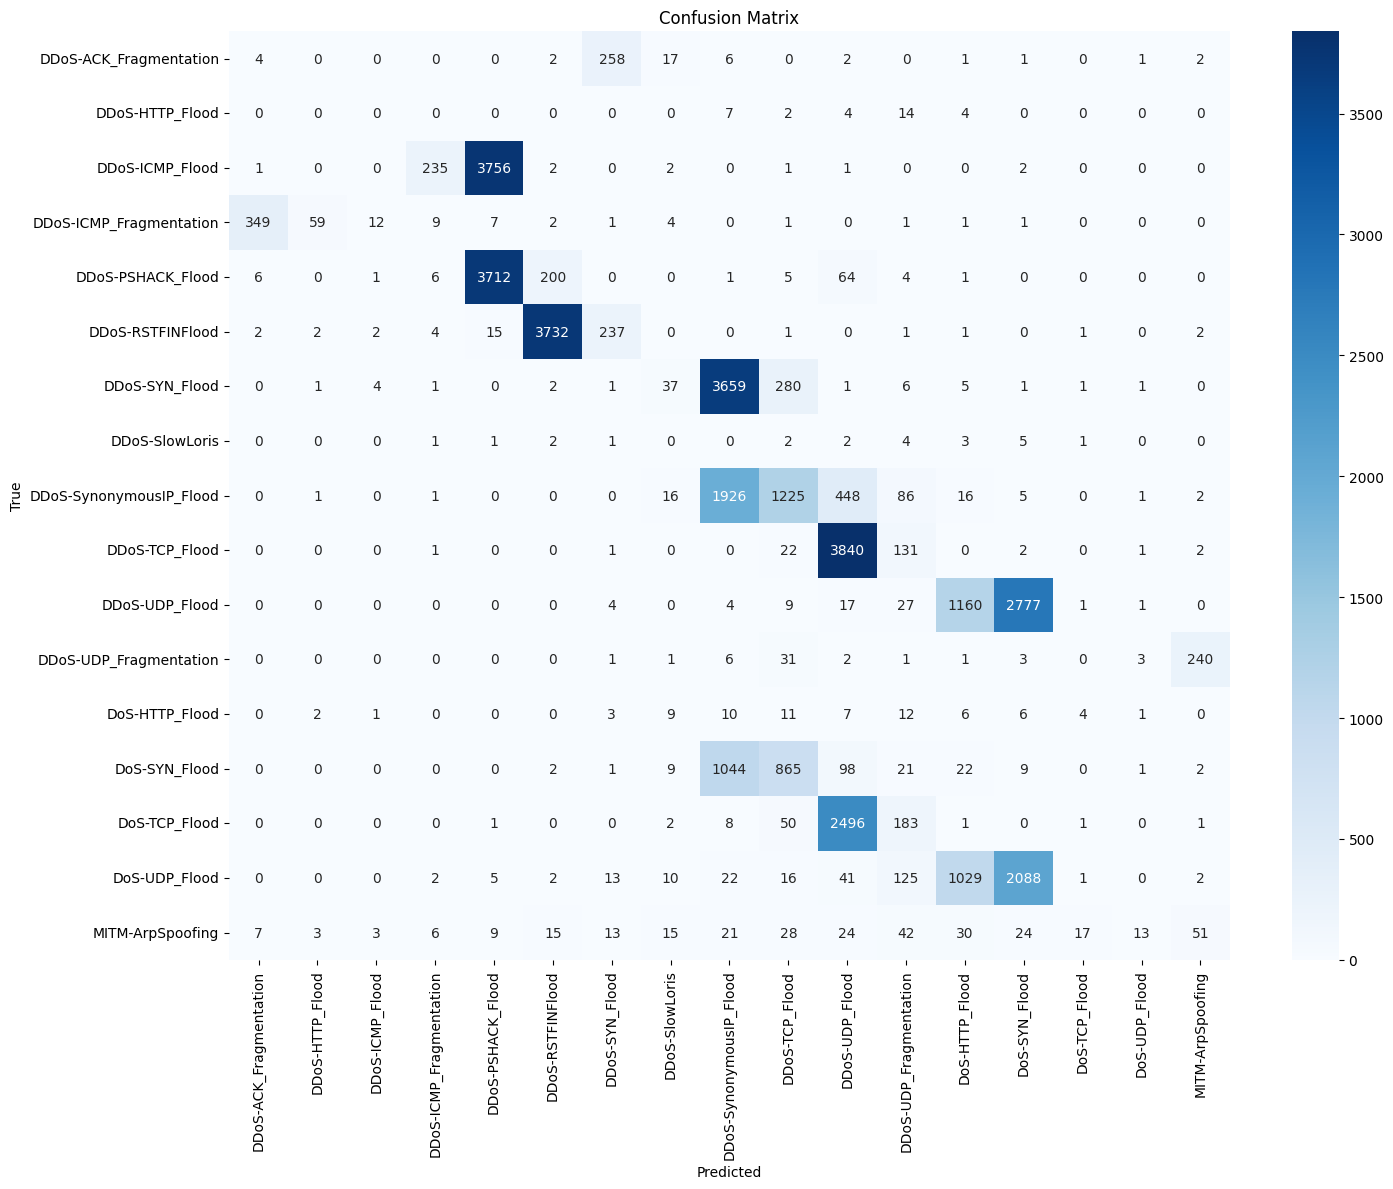


Class Mapping:
Class 0: DDoS-ACK_Fragmentation
  Train samples: 1174
  Test samples: 294
Class 1: DDoS-HTTP_Flood
  Train samples: 122
  Test samples: 31
Class 2: DDoS-ICMP_Flood
  Train samples: 16000
  Test samples: 4000
Class 3: DDoS-ICMP_Fragmentation
  Train samples: 1790
  Test samples: 447
Class 4: DDoS-PSHACK_Flood
  Train samples: 16000
  Test samples: 4000
Class 5: DDoS-RSTFINFlood
  Train samples: 16000
  Test samples: 4000
Class 6: DDoS-SYN_Flood
  Train samples: 16000
  Test samples: 4000
Class 7: DDoS-SlowLoris
  Train samples: 90
  Test samples: 22
Class 8: DDoS-SynonymousIP_Flood
  Train samples: 14910
  Test samples: 3727
Class 9: DDoS-TCP_Flood
  Train samples: 16000
  Test samples: 4000
Class 10: DDoS-UDP_Flood
  Train samples: 16000
  Test samples: 4000
Class 11: DDoS-UDP_Fragmentation
  Train samples: 1156
  Test samples: 289
Class 12: DoS-HTTP_Flood
  Train samples: 287
  Test samples: 72
Class 13: DoS-SYN_Flood
  Train samples: 8294
  Test samples: 2074
Class 14

In [28]:
# Predict & evaluate
y_pred_raw = model.predict(X_test)  # Raw predictions (continuous values)
y_pred = np.round(y_pred_raw).astype(int)  # Rounded to nearest integer for classification

# Ensure predictions are within valid class range
y_pred = np.clip(y_pred, 0, len(le.classes_) - 1)

# 1. Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# 2. Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Get unique labels actually present in the test set
unique_labels = np.unique(np.concatenate([y_test, y_pred]))
actual_classes = le.inverse_transform(unique_labels)

# 3. Confusion Matrix
plt.figure(figsize=(15, 12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=actual_classes,
            yticklabels=actual_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print class mapping
print("\nClass Mapping:")
for idx, label in enumerate(le.classes_):
    count_train = (y_train == idx).sum()
    count_test = (y_test == idx).sum()
    print(f"Class {idx}: {label}")
    print(f"  Train samples: {count_train}")
    print(f"  Test samples: {count_test}")

# 4. Print sample predictions
print("\nSample Predictions (first 5):")
for idx in range(5):
    true_label = le.inverse_transform([y_test[idx]])[0]
    pred_label = le.inverse_transform([y_pred[idx]])[0]
    pred_prob = y_pred_raw[idx]
    print(f"True: {true_label}")
    print(f"Predicted: {pred_label}")
    print(f"Raw prediction value: {pred_prob:.2f}")
    print("-" * 50)

In [29]:
# show coefficients and predictions
try:
    coefs = model.coef_
    features = X_num.columns.tolist()
    coef_df = pd.DataFrame({'feature': features, 'coef': coefs})
    coef_df['abs_coef'] = coef_df['coef'].abs()
    display_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns=['abs_coef']).head(20)
    print("\nTop feature coefficients:")
    print(display_df.to_string(index=False))
    
    # Show predictions với tên classes gốc
    print("\nExample predictions (first 5):")
    y_pred_classes = le.inverse_transform(y_pred.round().astype(int))
    y_test_classes = le.inverse_transform(y_test)
    for true, pred in zip(y_test_classes[:5], y_pred_classes[:5]):
        print(f"True: {true}, Predicted: {pred}")
        
except Exception as e:
    print('Could not show results:', e)

# Save both model and label encoder
import joblib
save_dir = os.path.join(root_dir, 'pretrained')
os.makedirs(save_dir, exist_ok=True)

# Save model
model_path = os.path.join(save_dir, 'linear_regression_model.joblib')
joblib.dump(model, model_path)
print('\nModel saved to', model_path)

# Save label encoder
le_path = os.path.join(save_dir, 'label_encoder.joblib')
joblib.dump(le, le_path)
print('Label encoder saved to', le_path)


Top feature coefficients:
        feature          coef
            UDP -1.048048e+01
         Number -9.138257e+00
psh_flag_number -5.566633e+00
fin_flag_number -4.646737e+00
syn_flag_number -3.059123e+00
  Protocol Type  1.213101e+00
          HTTPS  1.153277e+00
      syn_count  1.099119e+00
         Weight  6.685456e-01
       Variance -1.164035e-01
           HTTP  7.154305e-02
       Magnitue  5.230517e-02
         Radius -6.358481e-03
      rst_count  3.021339e-03
      urg_count -2.350918e-03
            Min -1.202249e-03
  flow_duration -5.133325e-05
            IAT -3.724250e-07
  Header_Length  2.250746e-07
           Rate  6.964938e-08

Example predictions (first 5):
True: DDoS-RSTFINFlood, Predicted: DDoS-RSTFINFlood
True: DoS-SYN_Flood, Predicted: DDoS-SynonymousIP_Flood
True: DDoS-PSHACK_Flood, Predicted: DDoS-PSHACK_Flood
True: DDoS-PSHACK_Flood, Predicted: DDoS-PSHACK_Flood
True: DDoS-ACK_Fragmentation, Predicted: DDoS-SYN_Flood

Model saved to D:/vhproj\intrusion-net